# Exploring Tweets data for monitoring Disaster using the exploratory data analysis (EDA) notebook

#### Introduction

This notebook is the first step in the DS4A Team 155 Project: Exploratory Data Analysis.
Social Networks have become a crucial communication channel in emergencies since users may report concerning situations in real-time. As a result, more agencies (i.e. disaster relief organizations and news agencies) are interested in monitoring Social Networks such as Twitter. However, tweets from people may or may not be actually realted to disasters. Therefore, machine learning models which predict real-time publication about emergencies and disasters are required.
From a set of different tweets, this project aims to predict which Tweets are about real disasters and which ones are not.


##### The proposed EDA approach to analysis the twitter messages is divided as follows: 
- Import the libraries
- Input Data
- Basic Informations
- Clean the data
- Feature Engineering
- Analizing Data
- Process Data
- Summary


### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
import re

from nltk.stem import PorterStemmer 
from pylab import rcParams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import defaultdict

# Importing the required parameter for plotting 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Input Data

The data for this project includes 10876 tweets, divided into two different datasets: a train dataset (7613 tweets) and a test dataset (3263 tweets)
The datasets have the following columns:


The train dataset has the following columns:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this feature denotes whether a tweet is about a real disaster (1) or not (0)


#### Train dataset

In [58]:
df = pd.read_csv('Data/train.csv', dtype={'id': int, 'keyword': object, 'location': object, 'text': object, 'target': int})
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#### Test dataset

In [60]:
df_test = pd.read_csv('Data/test.csv', dtype={'id': int, 'keyword': object, 'location': object, 'text': object})
df_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Basic Informations

 In this case we use the info() function to print a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. For our case, we have 7613 rows and 5 columns. Location is the column with the most null values, followed by the Keywords column. Also, we can see that we have two data types: int32 and object.


In [4]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 238.0+ KB


The describe() method returns a description of the data in the df. If the df contains numerical data, the description contains: count, mean, std, min, percentiles (25%,50%,75%) and max columns. 

In [5]:
df.describe( )

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In our DataFrame, we can find two numerical columns: id & target. For this case, we have complete information for the 7613 tweets (non null values). The mean of the target column is 0.42966, which means that most of the tweets do not correspond to a disaster (0: not disaster, 1: disaster), we can verify this information in the value counts function of the target column, that show us that we have 4342 with “0” target and 3271 with “1” target.

In [6]:
df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

With the function “df.isnull().sum()” we are adding the number of null values ​​that we have in each column. As we mentioned before, the column with the most null values is location with 2533 null values, followed by the Keyword column with 61 null values.


In [7]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

##### Observations

- There is a total of 7613 entries (train)
- There are numerous blanks in the dataset that need to be replaced with NA


### Clean Data

In the clean data part will be analyzed the characteristics of the information provided. This analysis is done based on the form of the data (uppercase, lowercase, etc.), the missing data, wrongly formatted data (for example, that in the text character cell it has a numeric data, they have special characters or links), the length of the tweet and how many words they have.


#### Removing rows, which own non-numerical values in the target column

In this part, we have a dataset that was classified by natural disaster based on a text provided by a tweet. To avoid having data that was not classified in the train part, we remove the data that has no classification with the .notnull() function.



In [8]:
df[pd.to_numeric(df['target'], errors='coerce').notnull()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In the target column, a value other than 1 and 0 may have been entered during the classification stage. In this step, the dataset is filtered only by the values ​​that have a 1 and a 0 in the target.

#### Removing rows, which have not 1 and 0 values in target column


In the target column, a value other than 1 and 0 may have been entered during the classification stage. In this step, the dataset is filtered only by the values ​​that have a 1 and a 0 in the target. This step is done focused on the model of not having data that does not have a classification.



In [9]:
def is_valid_number(x):
    if x == 1 or x == 0:
        return True
    else:
        return True
df[df['target'].apply(lambda x: is_valid_number(x))]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#### Removing punctuations and numbers

In this part we will focus on the text column. Within this column, there is the tweet and it is sought to eliminate the punctuation marks and numbers, which add length to the text but do not add value to the message.


In [10]:
df['text_clean'] = df['text'].str.replace('[^\w\s]', '', regex=True).str.replace('\d+', '', regex=True)
df.head(5)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


#### Removing uppercase

The characters have variations of uppercase and lowercase, but represent the same word. To avoid this situation, in this part of the code for the entire text column we convert the entire text string to lowercase using the "lower" function


In [11]:
df['text_clean']=df['text_clean'].apply(lambda x: x.lower())
df.head(5)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


#### Removing hyperlink

In this part we will focus on the text column. Within this column, there is the tweet and it is sought to eliminate hiperlink, which add length to the text but does not add value to the message. We use the regex library  and replace all the possible hyperlink 



In [12]:
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x))
df.head(5)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


#### Removing square brackets

In this part we will focus on the text column. Within this column, there is the tweet and it is sought to eliminate the brackets, which add length to the text but does not add value to the message. We use the regex library  and replace all the possible hyperlink 


In [13]:
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('\[.*?\]', '', x))
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('<.*?>+', '', x))
df.head(5)

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


### Feature Engineering

#### Counting the number of words

Using a lambda function, we split the text in the “text clean” column and count how many words there are in each tweet. For example, the tweet with id=1 has 13 words.


In [14]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))
df.head(5)

,id,keyword,location,text,target,text_clean,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16


#### Adding the text length 

Similarly, we can calculate how many characters there are in each tweet, applying just the len(x) function. The tweet with id=1 has 68 characters:


In [15]:
df['size'] = df['text_clean'].apply(lambda x: len(x))
df.head(5)

,id,keyword,location,text,target,text_clean,word_count,size
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,13,68
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,37
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,22,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,7,58
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,16,86


### Analizing Data

#### Number of Tweets with disasters (1) and non-disasters (0)

We can plot a bar graph to check how many tweets are disasters and how many are not. We take the target column to a new dataframe and plot the graph using seaborn:


<AxesSubplot:ylabel='target'>

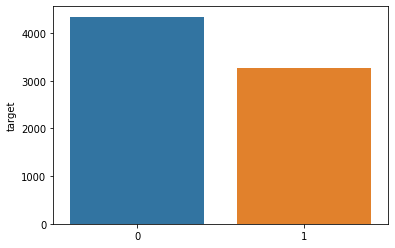

In [16]:
df_target = df['target'].value_counts().to_frame()

## seaborn barplot to display barchart
rcParams['figure.figsize'] = 5, 4
sns.barplot(data=df_target, x=df_target.index, y="target")

We can see that there are more non-disaster tweets (0).

#### Top twenty locations 

Although not every tweet has location information, we can investigate which cities or countries are more represented in the dataset. We calculate the value counts for the column “location” and plot the top 20 results in a bar graph.


<AxesSubplot:>

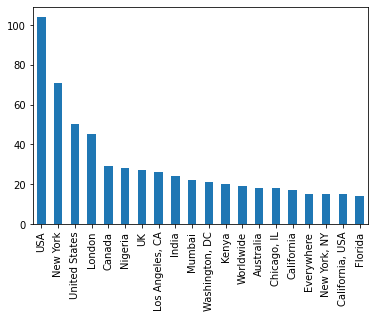

In [17]:
top_location = df["location"].value_counts().head(20)
top_location.plot(kind='bar')

The top locations are “USA”, “New York”, “United States” and “London”. Clearly, USA and United States refer to the same country, and New York is a city in that country. Therefore, it is a good idea to standardize the locations, specially the ones that refer to the same country (USA = United States). However, we will probably leave both cities and countries in our location column, as it is good to have location up to a city scale, even though some of the tweets have only the country and there is no way to find from which city they were written.

#### Histogram of the text size 

In the following histogram, we can see the distribution of the length (characters) of the tweets, which is left-skewed. As expected, there are very few short tweets, and most of them have approximately 120 characters. The maximum number of characters is 140, and therefore we can deduce that this dataset has tweets that were sent before november 2017, when twitter decided to double the character limit from 140 to 280 characters.  

<AxesSubplot:>

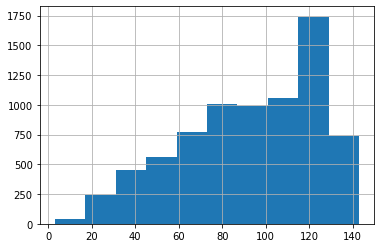

In [18]:
df['size'].hist()

#### Histogram of the number words

Conversely, the following histogram of the amount of words in the tweets is relatively symmetric, although it has a bit of a longer right tail. We can see that most tweets have between 10 and 18 words.

<AxesSubplot:>

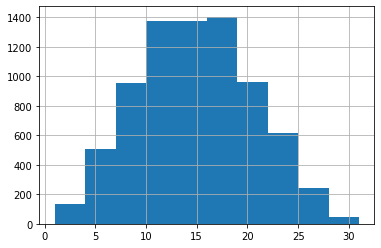

In [19]:
df['word_count'].hist()

#### Histogram of the average word length

Finally, we plot a histogram of the average word length in each tweet. We can see that it is a right-skewed distribution and that the average word length in most tweets is 5 to 6 characters. 


<AxesSubplot:>

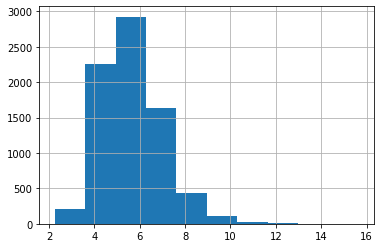

In [20]:
df['text_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### Process data

#### Word tokenization

In [21]:
AllReviews = df['text_clean']
AllReviews.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text_clean, dtype: object

In [22]:
review_words_lengths = AllReviews.apply(lambda x: len(nltk.word_tokenize(x)))

#### Sentences with two words

In [23]:
AllReviews[review_words_lengths[review_words_lengths == 2].index].head(5)

22                       love skiing
30                           the end
113    aftershock httpstcoxmwodfmtui
131      aftershock httpstcojvppkhjy
276                apocalypse please
Name: text_clean, dtype: object

#### Max and min values in the number of words

In [24]:
print("Minimun number of words", min(review_words_lengths))
print("Maximum number of words", max(review_words_lengths))

Minimun number of words 1
Maximum number of words 31


#### Histogram of the tokenization words

<AxesSubplot:>

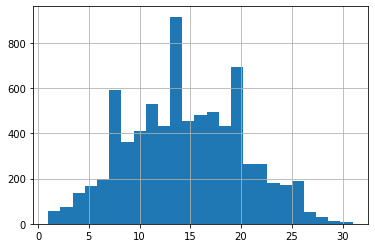

In [25]:
## Setting the resolution for better clarity 
review_words_lengths.hist(bins = 25)

The results of the tokenization process show that there is a significant concentration in the groups of tweets that have a number of words between 10 and 20 words. Being the lengths of 13 and 14 where the majority of the tweets are found, with more than 1000 records only in those two lengths. In general terms, it could be said that most of the tweets don’t really correspond to natural disasters, because in the middle of an emergency there is not enough time to write a very long tweet.

#### Histogram of the tokenization words for disaster

<AxesSubplot:>

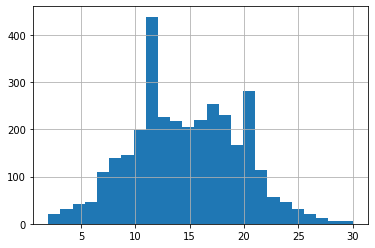

In [33]:
disaster = df[df.target == 1] 
Reviews_disaster = disaster['text_clean'] 
review_words_lengths_disaster = Reviews_disaster.apply(lambda x: len(nltk.word_tokenize(x)))
review_words_lengths_disaster.hist(bins = 25)

This histogram shows what was intuited in the analysis of the previous histogram. Analyzing only the tokenization of tweets that actually correspond to disasters, the distribution of most tweets leans towards shorter lengths than those shown in the histogram without the filtered data.

In conclusion, the precaution that must be taken when training the model must be taken into account, due to the little information that a tweet that corresponds to disaster can contain (remember that the stop words are generating noise when generating the histogram).
In the word cloud diagram that corresponds to positive tweets for disaster, it can be seen that there are keywords that indicate what may be the most recurrent disasters or events in the dataset, such as fires, landslides, terrorist attacks and accidents. Noise can also be evidenced in the data generated by the stop words.


#### Text visualization with word clouds

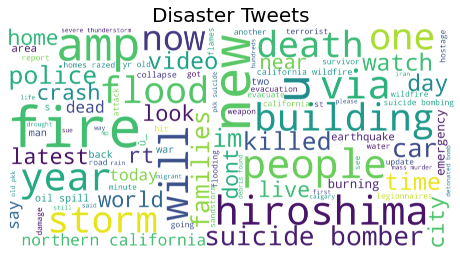

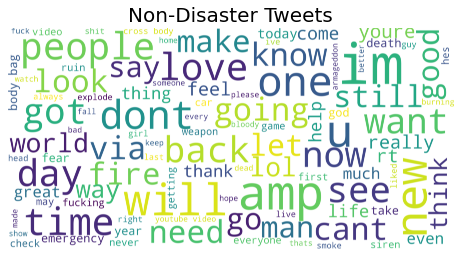

In [26]:
def word_cloud_rating(data, target_value, title):
    
    data_filtered = data[data.target == target_value] #filtering according to the star value
    Reviews = data_filtered.text_clean

    Reviews_text = ' '.join(Reviews.values) #joining all the words together

    # Creating a word cloud object
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",scale = 10,width=800, height=400).generate(Reviews_text)

    # Plotting the generated word cloud

    plt.figure(figsize=(8, 19))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontsize=20);
    plt.axis("off")
    plt.show()
    
##### Filtering by target equal 1    
word_cloud_rating(df, 1, 'Disaster Tweets')

##### Filtering by target equal 0    
word_cloud_rating(df, 0, 'Non-Disaster Tweets')

 In the word cloud diagram that corresponds to positive tweets for disaster, it can be seen that there are keywords that indicate what may be the most recurrent disasters or events in the dataset, such as fires, landslides, terrorist attacks and accidents. Noise can also be evidenced in the data generated by the stop words.
As expected, in the tweets that are not related to disasters, there are no words that have a critical meaning or a disaster relationship, for instance, words like people, love, world and time are the most relevant.


#### Most common keywords

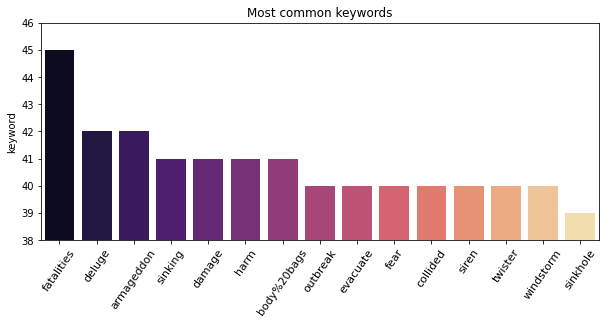

In [67]:
common_keywords = df["keyword"].value_counts().to_frame().head(15)
fig = plt.figure(figsize=(10,4))
sns.barplot(data=common_keywords, x=common_keywords.index, y="keyword",palette="magma")
plt.ylim(38, 46)
plt.title("Most common keywords")
plt.xticks(rotation=55, size=11);

 In the analysis of the distribution of the data in terms of keywords, there is a main word that is transversal to any catastrophic event and that is "fatalities". Then, there are the words related to events that have the component of rain. There are some words that have an important role and that are related to the impact generated by disasters, words like fear, damage, injuries, etc.

#### Most commun words in the tweets

In [45]:
counter = Counter()
for text in df['text'].values:
    for word in text.split():
        counter[word] += 1
counter.most_common(20)

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('I', 1197),
 ('for', 820),
 ('is', 814),
 ('on', 773),
 ('-', 763),
 ('you', 632),
 ('The', 552),
 ('my', 549),
 ('with', 508),
 ('that', 492),
 ('at', 485),
 ('by', 469),
 ('it', 433),
 ('from', 372)]

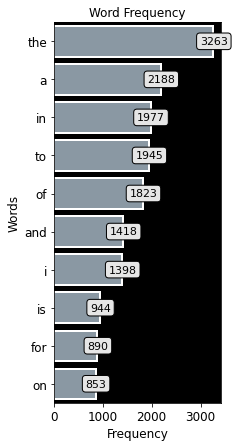

In [41]:
data = dict(sorted(counter.items(), key = lambda x: x[1] ,reverse = True)[:10])
words = list(data.keys())
frequency = list(data.values())
frequency

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 7))
ax.set_facecolor('black')
ax = sns.barplot(x = frequency, y = words, color = '#8699A7', edgecolor = 'white', linewidth = 2)
plt.title('Word Frequency', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.xticks(size = 12)
plt.yticks(size = 12)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
    width = p.get_width()
    plt.text(9.5 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 11)
plt.show()

Finally, in the analysis of the frequency of each word, it is evident that the largest amounts are found in the stop words. This confirms what was previously mentioned, when it was said that when these types of words are not removed, noise is created in the data that biases any analysis that one wants to carry out on the composition of the words.

####  Removing stop words in the tweets

In [63]:
disaster = df[df.target == 1]

Reviews_disaster = disaster['text_clean'].head(10)  

text_tokens = word_tokenize(Reviews_disaster_long)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

## Summary
- First of all, we imported all the libraries that would be useful to analyze the information of the datasets (pandas, numpy, matplotlib, etc)

- Then, we uploaded the two datasets (train and test datasets) into our notebook and we gave a basic description of it, describing its columns and summarizing some important information for our case, like the most repetitive target in the data (0: not disaster)

- Thirdly, we cleaned the data, in order to extract the most valuable information from it. We removed rows, which do not have 1 and 0 values in target column, punctuations, numbers, uppercase, hyperlinks and square brackets.

- For the feature engineering section, we added some useful columns such as: number of words in the tweets and text length (total characters). We found out that this dataset was probably made before 2017, when the tweet limit was 140 characters.

- Finally, we analyze the data, using some useful visualizations such as: histograms, barplots and word clouds graphs, focusing on the most repetitive words. Here we found an important opportunity with “stop words” that are popular in most of the tweets, but without a context do not give us a lot of information.
